<a href="https://colab.research.google.com/github/Mounish2023/fastaicourse/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
(path/'/root/.fastai/data/oxford-iiit-pet/images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_25.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_102.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_263.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_142.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_189.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_199.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_32.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_94.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_166.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_33.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_101.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_55.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_22.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_164.jpg'),Pa

In [10]:
fname = (path/'/root/.fastai/data/oxford-iiit-pet/images').ls()[0]
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_25.jpg')

In [17]:
fname.name

'beagle_25.jpg'

In [11]:
pattern = r'(.+)_\d+\.jpg'

In [18]:
import re
re.findall(pattern,fname.name)

['beagle']

In [19]:
fnames = (path/'/root/.fastai/data/oxford-iiit-pet/images').ls()


In [20]:
all_names = []
for f in fnames:
  all_names.append(re.findall(pattern, f.name))

In [22]:
all_names[4]

['chihuahua']

In [23]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    item_tfms=Resize(460),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+\.jpg$'),'name'),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [26]:
dls = pets.dataloaders(path/'/root/.fastai/data/oxford-iiit-pet/images')

In [30]:
len(dls)

2

In [40]:
dls.bs

64

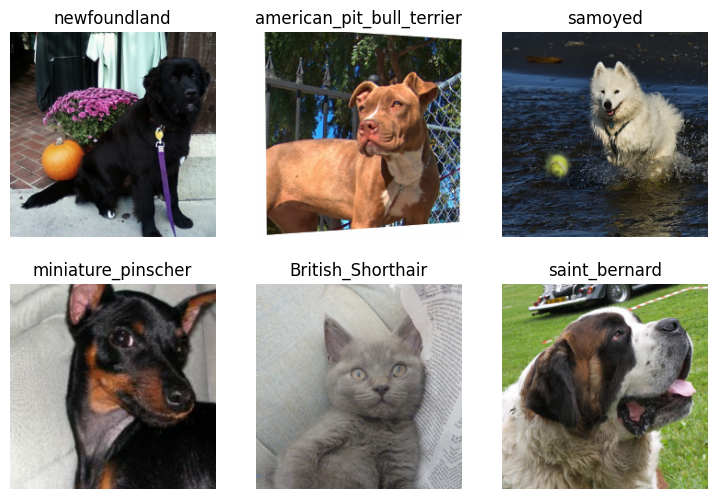

In [42]:
dls.train.show_batch(max_n=6,nrows=2)

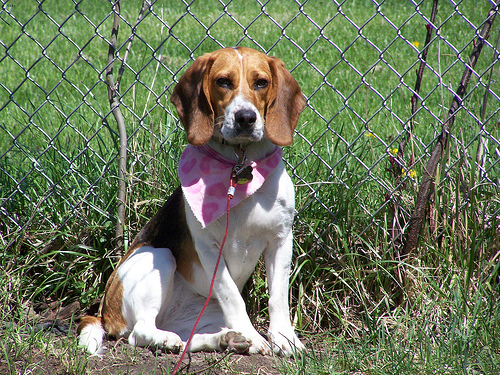

In [31]:
from PIL import Image

Image.open((path/'/root/.fastai/data/oxford-iiit-pet/images/beagle_25.jpg'))

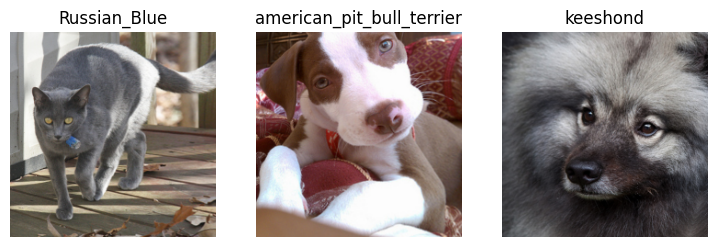

In [43]:
dls.show_batch(nrows=1, ncols=3)

In [44]:
pets.summary(path/'/root/.fastai/data/oxford-iiit-pet/images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/shiba_inu_101.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/shiba_inu_101.jpg
    applying partial gives
      shiba_inu
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(33)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(33))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: